In [1]:
import numpy as np

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:33<00:00, 24.0MB/s]
100% 2.04G/2.04G [01:33<00:00, 23.5MB/s]


In [11]:
!ls

'plantvillage dataset'	 plantvillage-dataset.zip   sample_data


In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

kaggle_credentials = json.load(open['kaggle.json'])

os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']

os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

!kaggle datasets download -d abdallahalidev/plantvillage-dataset


In [12]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Peach___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold']
38
['Peach___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold']
38
['Peach___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold']


In [13]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['51053194-cb64-4594-8639-4657a7a7666f___Mt.N.V_HL 6179.JPG', '215c8317-c0ca-4b35-9ac2-28e01712e367___Mt.N.V_HL 8914.JPG', 'e53defea-84c4-4b41-8c12-a53dda9e61b8___Mt.N.V_HL 9085.JPG', '345f02f4-0d5d-44cf-ab60-24dbd9243e2c___Mt.N.V_HL 6071.JPG', '6b4ec55f-3013-49fd-b08a-6d25c71565a0___Mt.N.V_HL 6153.JPG']


In [15]:
print(len(os.listdir("plantvillage dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus")))
print(os.listdir("plantvillage dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus")[:5])

5357
['53251828-7d15-4c0d-8f67-795b69326594___YLCV_GCREC 2270.JPG', 'f8f0681e-4a15-4487-9d10-6433ccad2dee___UF.GRC_YLCV_Lab 02048.JPG', '833930f9-043f-4208-9eac-554aabbef2fb___UF.GRC_YLCV_Lab 03288.JPG', '821ab91a-6de6-45c7-85f1-0d1fe243e37c___YLCV_NREC 2153.JPG', 'de2dd43d-cb0e-45a8-8c46-d6ebaa3af0d2___UF.GRC_YLCV_Lab 08530.JPG']


In [16]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


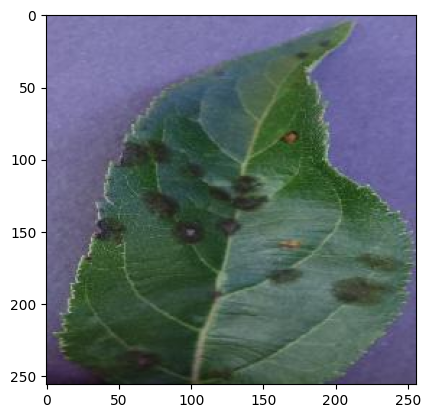

In [19]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'


img = mpimg.imread(image_path)

print(img.shape)

plt.imshow(img)
plt.axis('on')
plt.show()

In [20]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [21]:
# Image Parameters
img_size = 224
batch_size = 32 #32/64....

In [22]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [23]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [24]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [25]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [27]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 115s 81ms/step - loss: 0.9713 - accuracy: 0.7351 - val_loss: 0.4451 - val_accuracy: 0.8578
Epoch 2/5
1358/1358 [==============================] - 108s 79ms/step - loss: 0.2797 - accuracy: 0.9121 - val_loss: 0.3845 - val_accuracy: 0.8818
Epoch 3/5
1358/1358 [==============================] - 107s 79ms/step - loss: 0.1371 - accuracy: 0.9543 - val_loss: 0.5214 - val_accuracy: 0.8622
Epoch 4/5
1358/1358 [==============================] - 110s 81ms/step - loss: 0.0933 - accuracy: 0.9696 - val_loss: 0.4972 - val_accuracy: 0.8807
Epoch 5/5
1358/1358 [==============================] - 122s 89ms/step - loss: 0.0773 - accuracy: 0.9754 - val_loss: 0.6403 - val_accuracy: 0.8630


In [29]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 20s 59ms/step - loss: 0.6403 - accuracy: 0.8630
Validation Accuracy: 86.30%


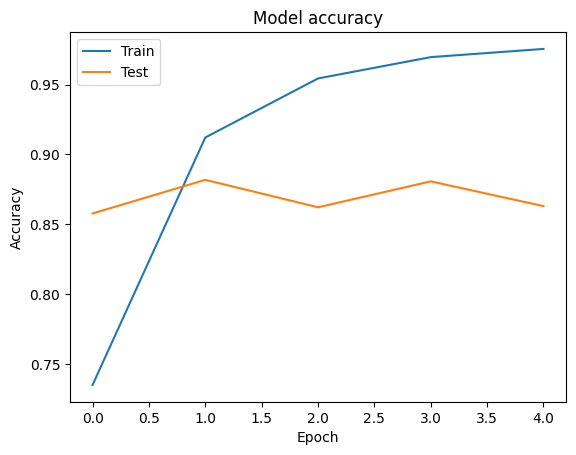

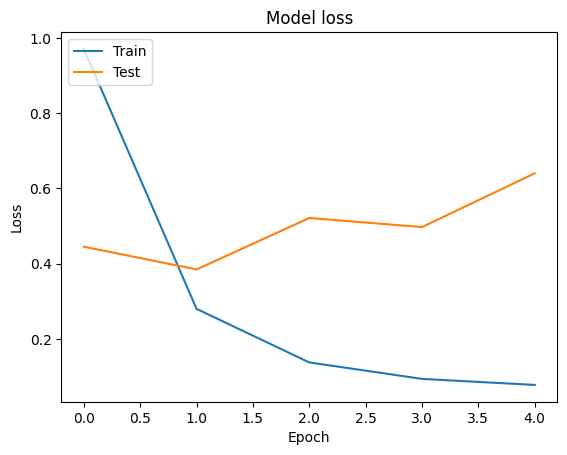

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array


def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [34]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [35]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [36]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [37]:

image_path = '/content/test_blueberry_healthy.jpg'

predicted_class_name = predict_image_class(model, image_path, class_indices)

print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 410ms/step
Predicted Class Name: Blueberry___healthy


In [38]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
model.save('plant_disease_prediction_model.h5')

#it will take too much time

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
model.save('drive/MyDrive/ML_Projects/trained_models/plant_disease_prediction_model.h5')